In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Read in the Complete Dataset
CompleteDataset = pd.read_csv('./CompleteDataset.csv')
CompleteDataset.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Get the Basic info of the dataset
CompleteDataset.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [3]:
CompleteDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [4]:
num_rows = CompleteDataset.shape[0] #Provide the number of rows    in the dataset
num_cols = CompleteDataset.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 17981
Column number: 75


In [5]:
# To check the column names in the dataset
CompleteDataset.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [6]:
# Drop the columns which will not be used in this project
CompleteDataset.drop('Photo',     axis = 1,inplace=True)
CompleteDataset.drop('Flag',      axis = 1,inplace=True)
CompleteDataset.drop('Club Logo', axis = 1,inplace=True)
CompleteDataset.drop('ID',        axis = 1,inplace=True)
CompleteDataset.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check whether any column has missing values
columns_with_missing_values = set(CompleteDataset.columns[CompleteDataset.isnull().mean()!=0])
print(columns_with_missing_values)

{'RCM', 'CDM', 'LB', 'RB', 'LW', 'Club', 'LF', 'RDM', 'LCB', 'RF', 'LWB', 'ST', 'LM', 'LCM', 'CAM', 'LDM', 'CF', 'LAM', 'RCB', 'CM', 'RS', 'RWB', 'RW', 'CB', 'RAM', 'LS', 'RM'}


Luckily most of these columns with missing values are ratings at all positions. These missing values are reasonable as a Goal Keeper may not have the position rating on other positions beside GK. These columns are not used in my questions, except Club. However for Club, a player with missing value in 'Club', the most possible explanation is that this player doesn't belong to any club for the moment, which means he is still available on free transfer. Any club insterested in him may sign this player without paying any transfer fee (The player's market value)

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Name: Nationality, dtype: int64


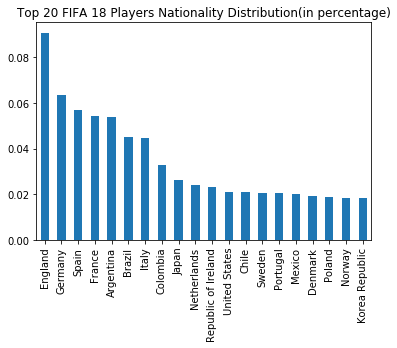

In [8]:
# Question 1: Which Nation has most number of Soccer Players collected in FIFA 18, list the top 20 Nations
nationality_vals = CompleteDataset.Nationality.value_counts()
print(nationality_vals.head(20))

(nationality_vals.head(20)/CompleteDataset.shape[0]).plot(kind="bar");
plt.title("Top 20 FIFA 18 Players Nationality Distribution(in percentage)");

25    1522
23    1394
24    1334
22    1324
21    1286
20    1245
26    1202
27    1152
29    1121
19    1069
28    1051
30     804
18     672
31     671
33     617
32     506
34     272
17     258
35     191
36     136
Name: Age, dtype: int64


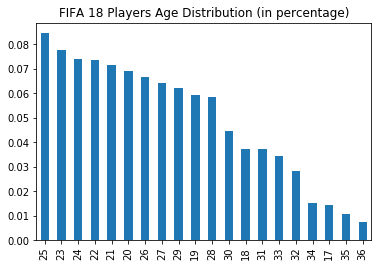

In [9]:
# Question 2: How about the age distribution of the FIFA 18 Players?
age_vals = CompleteDataset.Age.value_counts()
print(age_vals.head(20))

(age_vals.head(20)/CompleteDataset.shape[0]).plot(kind="bar");
plt.title("FIFA 18 Players Age Distribution (in percentage)");

In [10]:
# Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage
Value_Wage_DF = CompleteDataset[["Name", "Club", "Value", "Wage"]]
Value_Wage_DF.head()

,Name,Club,Value,Wage
0,Cristiano Ronaldo,Real Madrid CF,€95.5M,€565K
1,L. Messi,FC Barcelona,€105M,€565K
2,Neymar,Paris Saint-Germain,€123M,€280K
3,L. Suárez,FC Barcelona,€97M,€510K
4,M. Neuer,FC Bayern Munich,€61M,€230K


In [11]:
# Supporting function to convert string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

#Create New Wage_Number column to store numerical type Wage info
Value_Wage_DF['Wage_Number']  = Value_Wage_DF['Wage'].map(lambda x: str2number(x))

#Create New Value_Number column to store numerical type Value info
Value_Wage_DF['Value_Number'] = Value_Wage_DF['Value'].map(lambda x: str2number(x))

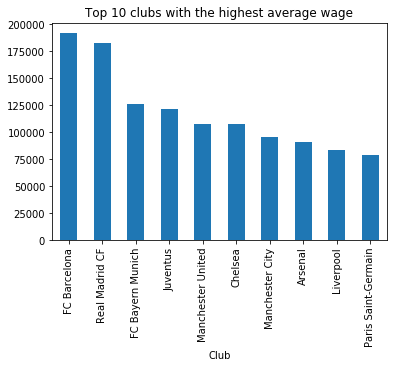

In [12]:
# Find out the top 10 clubs with the highest average wage
Value_Wage_DF.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest average wage");

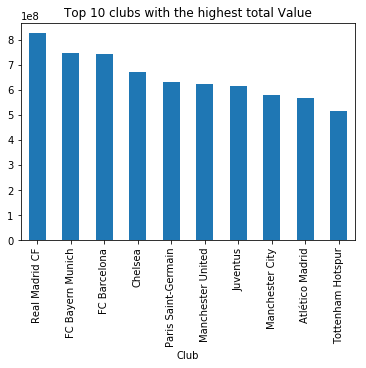

In [13]:
# Find out the top 10 clubs with the highest total player market value
Value_Wage_DF.groupby("Club")["Value_Number"].sum().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest total Value");

In [14]:
# Question 4: Choose the best squad
BestSquad_DF = CompleteDataset[['Name', 'Age', 'Overall', 'Potential', 'Preferred Positions']]
BestSquad_DF.head()

,Name,Age,Overall,Potential,Preferred Positions
0,Cristiano Ronaldo,32,94,94,ST LW
1,L. Messi,30,93,93,RW
2,Neymar,25,92,94,LW
3,L. Suárez,30,92,92,ST
4,M. Neuer,31,92,92,GK


In [15]:
# Select only one preferred position (first one)
BestSquad_DF['Preferred Position'] = BestSquad_DF['Preferred Positions'].str.split().str[0]
BestSquad_DF.head()

,Name,Age,Overall,Potential,Preferred Positions,Preferred Position
0,Cristiano Ronaldo,32,94,94,ST LW,ST
1,L. Messi,30,93,93,RW,RW
2,Neymar,25,92,94,LW,LW
3,L. Suárez,30,92,92,ST,ST
4,M. Neuer,31,92,92,GK,GK


In [16]:
def find_best_squad(position):
    BestSquad_DF_copy = BestSquad_DF.copy()
    BestSquad = []
    for i in position:
        BestSquad.append([i,BestSquad_DF_copy.loc[[BestSquad_DF_copy[BestSquad_DF_copy['Preferred Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), BestSquad_DF_copy[BestSquad_DF_copy['Preferred Position'] == i]['Overall'].max()])
        BestSquad_DF_copy.drop(BestSquad_DF_copy[BestSquad_DF_copy['Preferred Position'] == i]['Overall'].idxmax(), inplace = True)

    return pd.DataFrame(np.array(BestSquad).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [17]:
# Formation 433
squad_Formation433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('Best Squad of Formation 4-3-3')
print (find_best_squad(squad_Formation433))

Best Squad of Formation 4-3-3
Position             Player Overall
     GK           M. Neuer      92
     LB            Marcelo      87
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     RB           Carvajal      84
     LM         C. Eriksen      87
    CDM           T. Kroos      90
     RM       K. De Bruyne      89
     LW             Neymar      92
     ST  Cristiano Ronaldo      94
     RW           L. Messi      93


In [18]:
# Formation 3412
squad_Formation3412 = ['GK', 'CB', 'CB', 'CB', 'LM', 'CM', 'CM', 'RM', 'CAM', 'ST', 'ST']
print ('Best Squad of Formation 3-4-1-2')
print (find_best_squad(squad_Formation3412))

Best Squad of Formation 3-4-1-2
Position             Player Overall
     GK           M. Neuer      92
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     CB         L. Bonucci      88
     LM         C. Eriksen      87
     CM           N. Kanté      87
     CM           A. Vidal      87
     RM       K. De Bruyne      89
    CAM           Coutinho      86
     ST  Cristiano Ronaldo      94
     ST          L. Suárez      92


In [19]:
# Question 5: Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage
Correlation_DF = CompleteDataset[['Name', 'Age', 'Overall', 'Potential', 'Preferred Positions', 'Club', 'Nationality', 'Special', 'Value', 'Wage']]
Correlation_DF['Preferred Position'] = Correlation_DF['Preferred Positions'].str.split().str[0]
Correlation_DF.drop('Preferred Positions', axis = 1,inplace=True)

# One-hot encode the feature: "Club" & "Nationality"
le = LabelEncoder()
Correlation_DF['Club_onehot_encode']               = le.fit_transform(Correlation_DF['Club'].astype(str))
Correlation_DF['Nationality_onehot_encode']        = le.fit_transform(Correlation_DF['Nationality'].astype(str))
Correlation_DF['Preferred_Position_onehot_encode'] = le.fit_transform(Correlation_DF['Preferred Position'].astype(str))

#Create New Wage_Number column to store numerical type Wage info
Correlation_DF['Wage_Number']  = Correlation_DF['Wage'].map(lambda x: str2number(x))

#Create New Value_Number column to store numerical type Value info
Correlation_DF['Value_Number'] = Correlation_DF['Value'].map(lambda x: str2number(x))

Correlation_DF.corr()

,Age,Overall,Potential,Special,Club_onehot_encode,Nationality_onehot_encode,Preferred_Position_onehot_encode,Wage_Number,Value_Number
Age,1.000000,0.459765,-0.218264,0.238667,-0.005144,-0.029833,-0.052814,0.150006,0.079309
Overall,0.459765,1.000000,0.683474,0.604092,0.014416,-0.039084,-0.021502,0.593789,0.626001
Potential,-0.218264,0.683474,1.000000,0.399511,0.020327,-0.030274,-0.007843,0.519062,0.588074
Special,0.238667,0.604092,0.399511,1.000000,0.008653,-0.020016,0.071101,0.367419,0.376629
Club_onehot_encode,-0.005144,0.014416,0.020327,0.008653,1.000000,0.004485,0.001157,-0.009684,0.004005
Nationality_onehot_encode,-0.029833,-0.039084,-0.030274,-0.020016,0.004485,1.000000,-0.002518,-0.012253,-0.016290
Preferred_Position_onehot_encode,-0.052814,-0.021502,-0.007843,0.071101,0.001157,-0.002518,1.000000,0.021745,0.018435
Wage_Number,0.150006,0.593789,0.519062,0.367419,-0.009684,-0.012253,0.021745,1.000000,0.850510
Value_Number,0.079309,0.626001,0.588074,0.376629,0.004005,-0.016290,0.018435,0.850510,1.000000


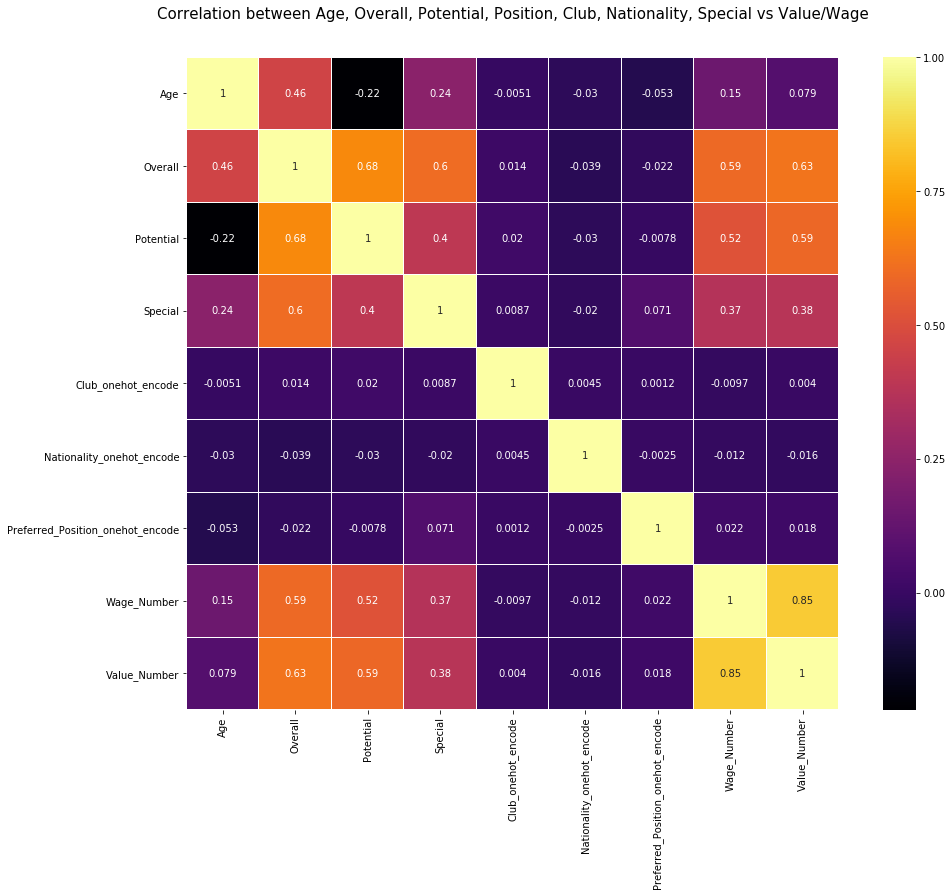

In [21]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)